In [82]:
from __future__ import print_function, division

%matplotlib inline
import scipy
import numpy as np

import nsfg
import matplotlib
import thinkstats2
import thinkplot

In [2]:
resp = nsfg.ReadFemResp()

In [92]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])

In [93]:
cleaned.timesmar.mean(), cleaned.timesmar.std()

(1.1042563150811282, 0.6018806341690439)

In [94]:
cleaned.jintendn.mean(), cleaned.jintendn.std()

(2.7106887668932482, 9.874282067817225)

In [95]:
pdf1 = thinkstats2.NormalPdf(cleaned.timesmar.mean(), cleaned.timesmar.std())
pdf1.Density(cleaned.timesmar.mean() + cleaned.timesmar.std())

0.4020244393694574

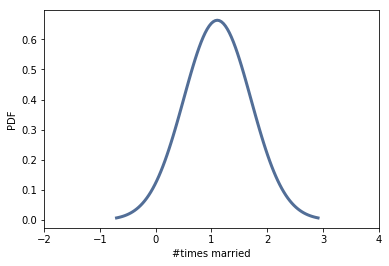

In [98]:
thinkplot.Pdf(pdf1, label='normal')
thinkplot.Config(xlabel='#times married', ylabel='PDF', xlim=[-2, 4])

In [99]:
pdf2 = thinkstats2.NormalPdf(cleaned.jintendn.mean(), cleaned.jintendn.std())
pdf2.Density(cleaned.jintendn.mean() + cleaned.jintendn.std())

0.02450514608123126

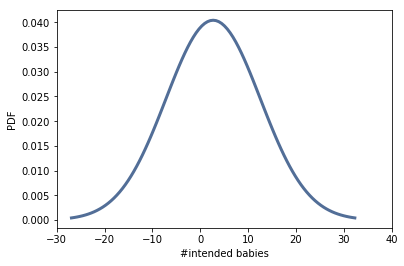

In [100]:
thinkplot.Pdf(pdf2, label='normal')
thinkplot.Config(xlabel='#intended babies', ylabel='PDF', xlim=[-30, 40])

Actually it is not possible to have negative values for timesmar(number of times a respondent got married) and jintendn(the respondent's intended number of babies) variables. The pdf shows in that way in order to be symmetrical.
For the first graph, we can say that getting married once has the highest probability while this probability decrease through the second and third marriages.
And for the second graph, the probability decreases when the intended number of babies increase.

In [23]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
def Mean(xs):
    return RawMoment(xs, 1)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)
def Var(xs):
    return CentralMoment(xs, 2)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Skewness(xs):
    return StandardizedMoment(xs, 3)
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [101]:
Skewness(cleaned.timesmar), PearsonMedianSkewness(cleaned.timesmar)

(0.5014888238655286, 0.19540716800075092)

Normally a positive skewness indicates that the distribution has a longer tail on the right. 
In that case, the mean is usually more than the median.

Pearson's skewness is positive, indicating that the distribution of #times married is slightly skewed to the right. 
even though it is close to symmetrical shape (skewness=0), it is still positively skewed.

In [103]:
Skewness(cleaned.jintendn), PearsonMedianSkewness(cleaned.jintendn)

(9.51025155482185, 0.3748957192719419)

Normally a positive skewness indicates that the distribution has a longer tail on the right. 
In that case, the mean is usually more than the median.

Pearson's skewness is positive, indicating that the distribution of 
intended babies is slightly skewed to the right. 

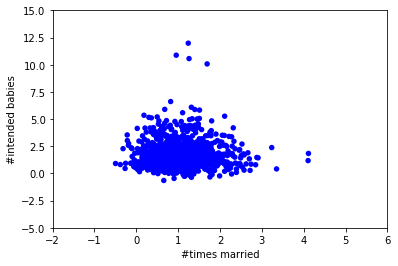

In [105]:
thinkplot.Scatter(cleaned.timesmar, cleaned.jintendn, alpha=1)
thinkplot.Config(xlabel='#times married',
                 ylabel='#intended babies',
                 axis=[-2, 6, -5, 15],
                 legend=False)

In [106]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [115]:
times_mar = Jitter(cleaned.timesmar)
j_intendn = Jitter(cleaned.jintendn)

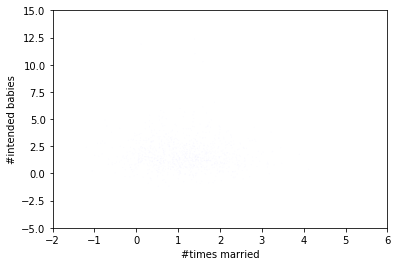

In [116]:
thinkplot.Scatter(times_mar, j_intendn, alpha=0.01, s=2)
thinkplot.Config(xlabel='#times married',
                 ylabel='#intended babies',
                 axis=[-2, 6, -5, 15],
                 legend=False)

In [67]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(0, 10, 2)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)

In [68]:
mean_tmarried = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

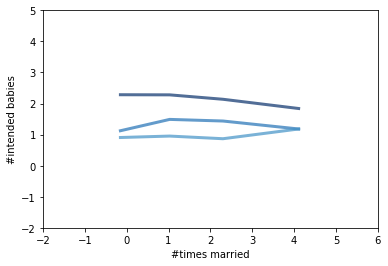

In [129]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_tmarried, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='#times married',
                 ylabel='#intended babies',
                 axis=[-2, 6, -2, 5],
                 legend=False)

75th percentile includes 2 babies on average, 50th percentile includes 1.3 babies on average, 25th percentile includes 0.9 babies on average.

In [90]:
scipy.stats.pearsonr(cleaned.timesmar, cleaned.jintendn)

(0.01551700835911458, 0.6114807903231604)

Pearson’s correlation coefficient = 0.01551700835911458
  * Positive correlation. Not a very strong one. It is a small correlation.
2-tailed p-value = 0.6114807903231604
  * P-value is very high. We can say that it is statistically not significant.

In [91]:
scipy.stats.spearmanr(cleaned.timesmar, cleaned.jintendn)

SpearmanrResult(correlation=0.004610944267147087, pvalue=0.880027447570696)

Pearson’s correlation coefficient = 0.004610944267147087
  * Positive correlation. Not a very strong one. It is a small correlation.
2-tailed p-value = 0.880027447570696
  * P-value is very high. We can say that it is statistically not significant.